Interpolated z value at (255.0703125, 74.4735717773438): 0.03081763984659635


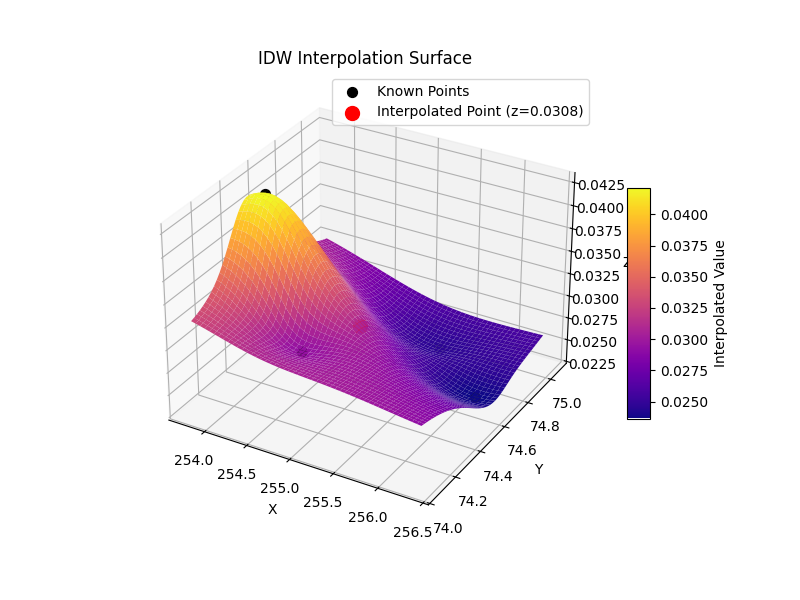

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

def idw_interpolation_great_circle(x, y, z, xi, yi, power=2, radius=6371):
    """
    Performs Inverse Distance Weighted (IDW) interpolation using great-circle distances.
    
    Parameters:
        x, y: Coordinates of known data points (lists or arrays) in degrees (longitude, latitude).
        z: Values at known data points (list or array).
        xi, yi: Coordinates where interpolation is desired (floats) in degrees (longitude, latitude).
        power: Power parameter controlling weight decay (default=2).
        radius: Radius of the Earth in kilometers (default=6371 km).
    
    Returns:
        zi: Interpolated value at (xi, yi).
    """
    # Convert x, y, xi, yi to radians
    x = np.radians(x)
    y = np.radians(y)
    xi = radians(xi)
    yi = radians(yi)
    z = np.array(z)
    
    # Compute great-circle distances using the Haversine formula
    delta_x = x - xi
    delta_y = y - yi
    a = np.sin(delta_y / 2)**2 + np.cos(y) * np.cos(yi) * np.sin(delta_x / 2)**2
    distances = 2 * radius * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Compute weights (inverse distance)
    weights = 1 / (distances**power)
    
    # Handle division by zero if an interpolated point coincides with a known point
    weights[distances == 0] = 1e12  # Large weight for exact matches
    
    # Compute IDW interpolation
    zi = np.sum(weights * z) / np.sum(weights)
    return zi

# Example Data (Known Points)
x_known = [253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337]
y_known = [74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753]
z_known = [0.04222093679422526, 0.02939444349332336, 0.02361927128232367, 0.02457275269829678]

# Define Grid for Interpolation
x_min, x_max = min(x_known), max(x_known)
y_min, y_max = min(y_known), max(y_known)

# Add some padding to the grid range for better visualization
padding = 0.1 * (x_max - x_min)
grid_x, grid_y = np.meshgrid(
    np.linspace(x_min - padding, x_max + padding, 50),
    np.linspace(y_min - padding, y_max + padding, 50)
)
grid_z = np.zeros_like(grid_x)

# Compute IDW for Each Grid Point
for i in range(grid_x.shape[0]):
    for j in range(grid_x.shape[1]):
        grid_z[i, j] = idw_interpolation_great_circle(x_known, y_known, z_known, grid_x[i, j], grid_y[i, j])

# Interpolated point
interpolated_point = (255.070312500000, 74.4735717773438)


# Calculate the interpolated z value for the given point
interpolated_z = idw_interpolation_great_circle(x_known, y_known, z_known, interpolated_point[0], interpolated_point[1])
print(f"Interpolated z value at {interpolated_point}: {interpolated_z}")


# Plot the Results as a Surface
%matplotlib widget
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(grid_x, grid_y, grid_z, cmap='plasma', edgecolor='none')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10, label="Interpolated Value")

# Add known points
ax.scatter(x_known, y_known, z_known, color='k', label="Known Points", s=50)

# Add the interpolated point
ax.scatter(
    interpolated_point[0], interpolated_point[1], interpolated_z,
    color='red', label=f"Interpolated Point (z={interpolated_z:.4f})", s=100
)

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("IDW Interpolation Surface")
plt.legend()
plt.show()